In [44]:
from sklearn.neural_network import MLPClassifier
from pandas import read_csv as rc
from pandas import DataFrame as df
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from seaborn import kdeplot
import seaborn as sns
from sklearn.metrics import confusion_matrix
from seaborn import set, heatmap
import matplotlib.pyplot as plt

In [20]:
#Loading the data
dataset_init=rc('iris',names=['Sepal_length','Sepal_width','Petal_length','Petal_width','Class'])
dataset=dataset_init.values
X=dataset[:,0:4] #Attributes
Y=dataset[:,4]   #True outputs

In [21]:
#Classify for the whole dataset
mlp=MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, max_iter=800)
mlp.fit(X,Y)
pred=mlp.predict(X)
score=mlp.score(X,Y)

In [22]:
#Spliting data
x_train, x_val, y_train, y_val=train_test_split(X,Y, test_size=0.3, random_state=0)
#Training set
mlp=MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, max_iter=800)
mlp.fit(x_train,y_train) #returns a trained mlp model in form of object named 'mlp'
predictions_train=mlp.predict(x_train)
accuracy_train=mlp.score(x_train, y_train)
print ("Training set accuracy : ",accuracy_train)

Training set accuracy :  0.9809523809523809


In [23]:
#Validation set
predictions_val=mlp.predict(x_val)
accuracy_val=mlp.score(x_val, y_val)
print ("Validation set accuracy : ",accuracy_val)


Validation set accuracy :  0.9777777777777777


In [30]:
plt.figure(figsize=(1024,780))

<Figure size 73728x56160 with 0 Axes>

<Figure size 73728x56160 with 0 Axes>

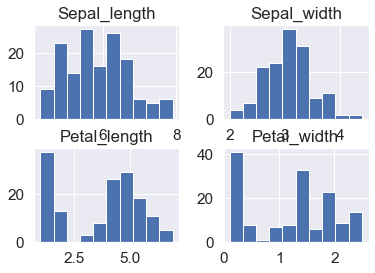

In [40]:
#Data Visualization
#Histograms
dataset_init.hist()
pyplot.show()


<Figure size 1728x1728 with 0 Axes>

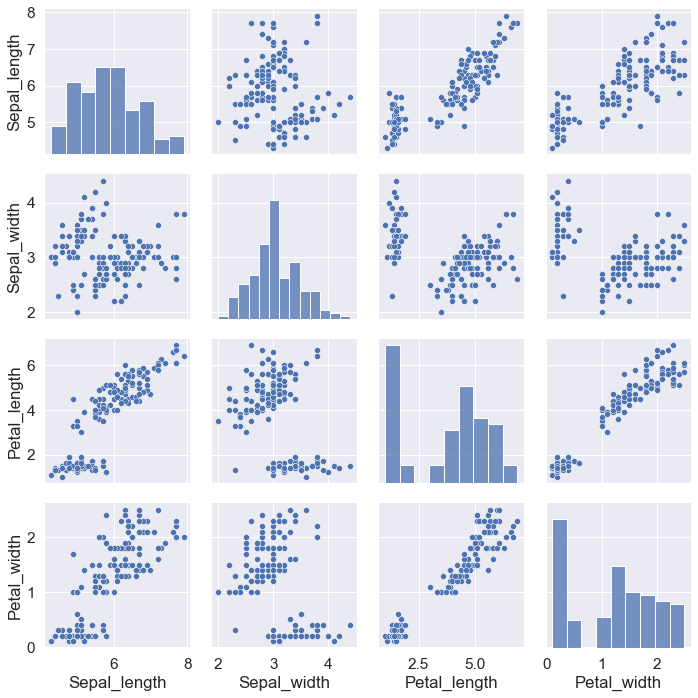

In [45]:
#Scatter_matrix
plt.figure(figsize=(24,24))
sns.pairplot(dataset_init)
plt.xticks(rotation = 45)
plt.tight_layout()
pyplot.show()

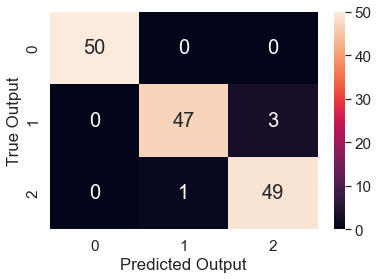

In [13]:
#Confusion matrix
cm=confusion_matrix(Y,pred, labels=["Iris-setosa","Iris-versicolor","Iris-virginica"])
df_cm = df(cm, range(3), range(3))
set(font_scale=1.4)#for label size
heatmap(df_cm, annot=True, annot_kws={"size": 20})
pyplot.xlabel("Predicted Output")
pyplot.ylabel("True Output")
pyplot.show()